In [1]:
using GeneralizedSasakiNakamura

In [2]:
using Plots, LaTeXStrings

In [3]:
# Specify which mode and what boundary condition
s=-2; l=2; m=2; a=0.7; omega=0.25; bc=UP; # Change to bc=IN to solve for R^in or X^in instead
# Specify where to match to ansatzes
rsin=-20; rsout=250;

# NOTE: julia uses 'just-ahead-of-time' compilation. Calling this the first time in each session will take some time
R = Teukolsky_radial(s, l, m, a, omega, bc, rsin, rsout)

TeukolskyRadialFunction(
    mode=Mode(s=-2, l=2, m=2, a=0.7, omega=0.25, lambda=2.8411233382314958),
    boundary_condition=UP,
    transmission_amplitude=1.0 + 0.0im,
    incidence_amplitude=205.05589286496422 - 60.33321745507691im,
    reflection_amplitude=-174.99152022894324 + 341.7170416974763im,
    normalization_convention=UNIT_TEUKOLSKY_TRANS
)

In [4]:
# Set up a grid of the tortoise coordinate rs
rsgrid = collect(-30:1:300) # Does not have to be within [rsin, rsout]
# Set up a grid of the Boyer-Lindquist r coordinate
# Convert from rsgrid using r_from_rstar(a, rs)
rgrid = [r_from_rstar(a, rs) for rs in rsgrid];

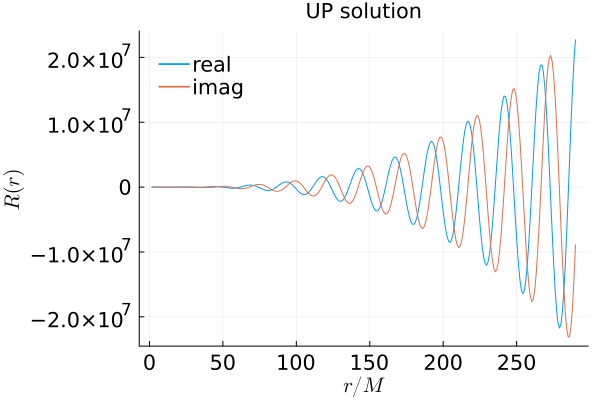

In [5]:
# Visualize the Teukolsky function

# Use the 'shortcut' interface to access the function
plot(rgrid, [real(R(r)) for r in rgrid], label="real")
# Use the full interface to access the function (and its derivative)
plot!(rgrid, [imag(R.Teukolsky_solution(r)[1]) for r in rgrid], label="imag")
plot!(
    legendfontsize=14,
    xguidefontsize=14,
    yguidefontsize=14,
    xtickfontsize=14,
    ytickfontsize=14,
    foreground_color_legend=nothing,
    background_color_legend=nothing,
    legend=:topleft,
    xlabel=L"r/M",
    ylabel=L"R(r)",
)
title!("$(R.boundary_condition) solution")

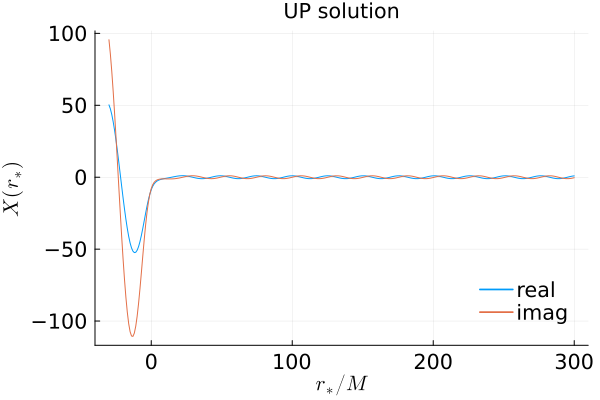

In [6]:
# Visualize the underlying GSN function

# Use the 'shortcut' interface to access the function
plot(rsgrid, [real(R.GSN_solution(rs)) for rs in rsgrid], label="real")
# Use the full interface to access the function (and its derivative)
plot!(rsgrid, [imag(R.GSN_solution.GSN_solution(rs)[1]) for rs in rsgrid], label="imag")
plot!(
    legendfontsize=14,
    xguidefontsize=14,
    yguidefontsize=14,
    xtickfontsize=14,
    ytickfontsize=14,
    foreground_color_legend=nothing,
    background_color_legend=nothing,
    legend=:bottomright,
    xlabel=L"r_{*}/M",
    ylabel=L"X(r_{*})",
)
title!("$(R.boundary_condition) solution")

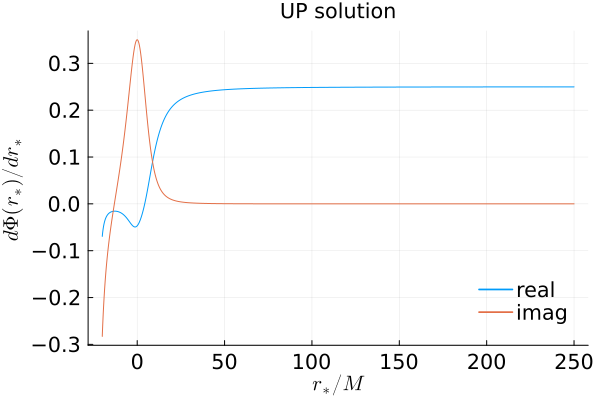

In [7]:
# Visualize the underlying complex frequency function
# NOTE: for this one, rstar has to be within [rsin, rsout]
plot(collect(rsin:0.1:rsout), [real(R.GSN_solution.numerical_Riccati_solution(rs)[2]) for rs in rsin:0.1:rsout], label="real")
# Use the full interface to access the function (and its derivative)
plot!(collect(rsin:0.1:rsout), [imag(R.GSN_solution.numerical_Riccati_solution(rs)[2]) for rs in rsin:0.1:rsout], label="imag")
plot!(
    legendfontsize=14,
    xguidefontsize=14,
    yguidefontsize=14,
    xtickfontsize=14,
    ytickfontsize=14,
    foreground_color_legend=nothing,
    background_color_legend=nothing,
    legend=:bottomright,
    xlabel=L"r_{*}/M",
    ylabel=L"d\Phi(r_{*})/dr_{*}",
)
title!("$(R.boundary_condition) solution")